In [3]:
#rcparams --- rc(runtime configuration)--it defines the sytle for every plot that is created
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 100 #high res figures

In [2]:
pip install matplotlib

     |████████████████████████████████| 11.6 MB 79 kB/s eta 0:00:014
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
     |████████████████████████████████| 156 kB 67 kB/s eta 0:00:011
  Using cached Pillow-7.2.0-cp36-cp36m-manylinux1_x86_64.whl (2.2 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_csv('cleaned_data.csv')

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [7]:
# to find the proportion of the response variable
df['default payment next month'].mean()

0.2217971797179718

In [9]:
#to know the no of values that belong to 0 and no of values that belong to 1
df['default payment next month'].value_counts()

0    20750
1     5914
Name: default payment next month, dtype: int64

In [13]:
#scikit-learn is machine learning package
#linear_model import logistic regresiion(classification model)
from sklearn.linear_model import LogisticRegression

In [12]:
pip install sklearn

Processing /home/red/.cache/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c/sklearn-0.0-py2.py3-none-any.whl
     |████████████████████████████████| 6.8 MB 418 kB/s eta 0:00:01
     |████████████████████████████████| 300 kB 332 kB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 51 kB/s  eta 0:00:01
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
#object of the class logisticregression
my_lr = LogisticRegression()

In [15]:
#it shows what all are the pararmeter avaiable for logistic regression
my_lr

LogisticRegression()

In [16]:
#instantiating the logistic regression model with default values
lr_model = LogisticRegression(C = 1.0, 
                              class_weight = None, 
                              dual = False, 
                              fit_intercept = True,
                             intercept_scaling = 1,
                             max_iter = 100,
                             multi_class = 'auto',
                             n_jobs = None,
                             penalty = 'l2',
                             random_state = None,
                             solver = 'warn',
                             tol = 0.0001,
                             verbose = 0,
                             warm_start = False)

In [17]:
#changing the default values
lr_model.C = 0.1
lr_model.solver = 'liblinear'
lr_model


LogisticRegression(C=0.1, solver='liblinear')

In [42]:
#taking first 10 rows of education and response variable for traing and next 10 rows for prediction
X = df['EDUCATION'][0:10].values.reshape(-1,1)

X


array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]])

In [40]:
y = df['default payment next month'][0:10].values.reshape(-1,1)
y

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [41]:
lr_model.fit(X, y)

/home/red/my_project1_dir/my_project1_env/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=0.1, solver='liblinear')

In [43]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]])

In [44]:
lr_model.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [50]:
#generating a synthetic data 
#uniform returns a random floating number btw the low and high (both included) and the number of values are going to be 1000
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [51]:
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

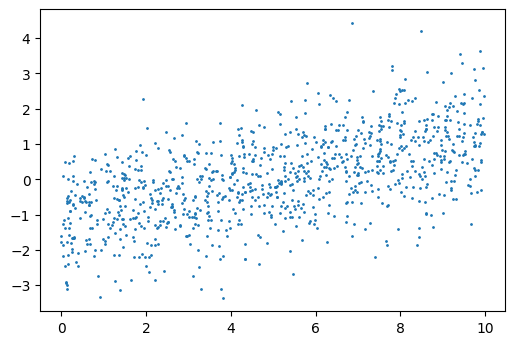

In [52]:
plt.scatter(X,y,s=1)
plt.show()


In [53]:
#performing the linear regression on the synthetic data which is generated
#and the prediction is perfprmed
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [54]:
lin_reg.fit(X.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.1612566002825888
[0.24002588]


In [55]:
y_pred = lin_reg.predict(X.reshape(-1,1))

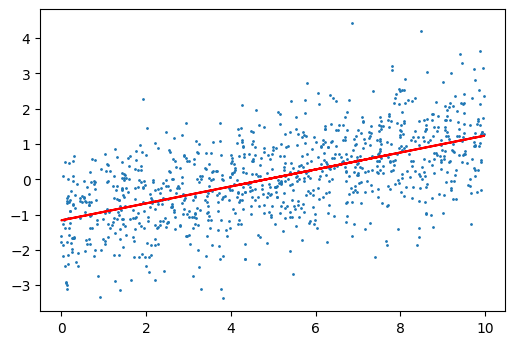

In [56]:
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')
plt.show()

In [57]:
#continuing with the logistiic regression splitiing the data for about 20 percent
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [58]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [59]:
np.mean(y_train)

0.223102526838873

In [60]:
np.mean(y_test)

0.21657603600225014

In [61]:
from sklearn.linear_model import LogisticRegression
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)

In [62]:
example_lr.fit(X_train, y_train)
y_pred = example_lr.predict(X_test)

In [65]:
is_correct = y_pred == y_test
is_correct
np.mean(is_correct)

0.7834239639977498

In [66]:
example_lr.score(X_test, y_test)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

In [67]:
#to calculate tp,fp,tn,fn
#p gives only the value with true , it sums up all the one together
P = sum(y_test)

In [74]:
P

1155

In [75]:
#tp are the ones where both acual and predicted both are one
TP = sum( (y_test==1) & (y_pred==1) )
TP

0

In [76]:
#to cualte the rate of tpr
#out of total positives how many are true positives
TPR = TP/P
TPR

0.0

In [77]:
#to calculate for FN
FN = sum( (y_test==1) & (y_pred==0) )
FN

1155

In [78]:
#to calculate the false negative ratio
FNR = FN/P
FNR

1.0

In [80]:
#TNR AND FNR
N = sum(y_test==0)
TN = sum((y_test==0) & (y_pred==0))
FP = sum((y_test==0) & (y_pred==1))
TNR = TN/N
FPR = FP/N
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [81]:
#in built method to get the confusion matrix just by passing the test and predicted values
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]])

In [82]:
#OBTAINING THE PREDICTED PROBABILITY FROM THE TRAINED MODEL
#predicting the probabilityof test data this predict_proba gives two values for each value it shows the probability of it occuring as 0
#and probability of it occuring as 1
#x_test is the testing test on which the model is already trained
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [87]:
#in np.sum 1 is the axis that means it sums up alog the rows rto check wether the pribability of both the 0 and 1 probability when added wether it gives one
prob_sum = np.sum(y_pred_proba,1)
prob_sum
#result all are one

array([1., 1., 1., ..., 1., 1., 1.])

In [89]:
#to check wether the shape is same as the testing data set
prob_sum.shape

(5333,)

In [91]:
#so both are same
X_test.shape

(5333, 1)

In [94]:
#to check all are 1 we can also use unique function which is similar to distinct so the distinct value is 1
np.unique(prob_sum)

array([1.])

In [96]:
#considering only the predicted probability of the second column
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

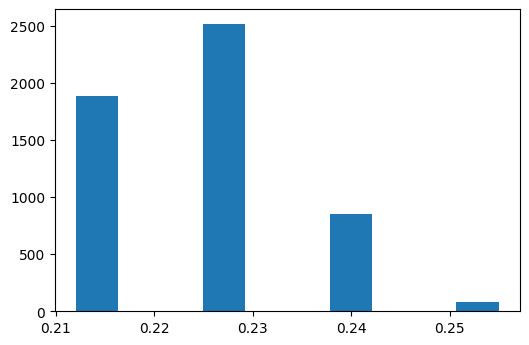

In [98]:
#using histogram function to find the number of values that belong to each bin
plt.hist(pos_proba)
plt.show()

Text(0, 0.5, 'Number of samples')

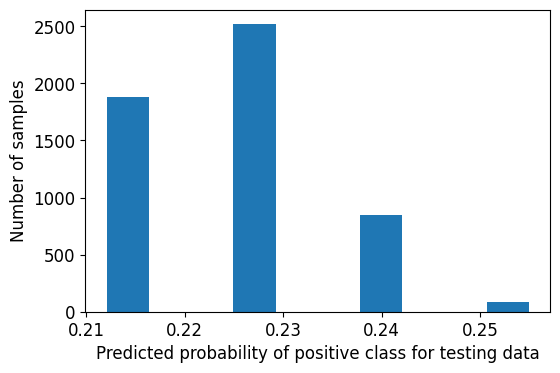

In [100]:
#to plot the same histogram with some changes in font size and putting labels
#rcparams give the default run time configuration for the plot we can also change them
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')
#x-axis shows the no of samples that belongs to each probability
#y-axis shows the positive probabilities

In [ ]:
#Also, notice that all the predicted probabilities are below 0.5. This is the reason every sample was predicted to be negative, using the 0.5 threshold. Now we can imagine that if we set our threshold below 0.5, 

In [101]:
#creating stacked histogram so we segregate btw positive (1) and negative(0)
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

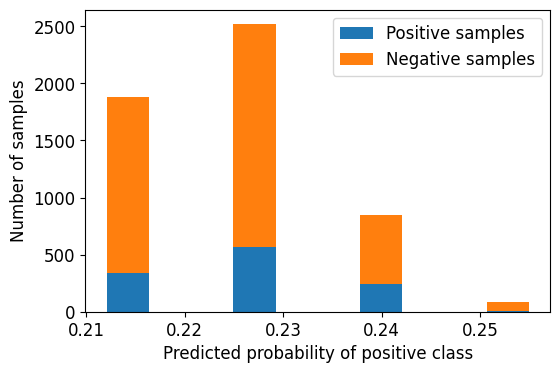

In [102]:
#plotting both positive and negative in the same histogram
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')
plt.show()


In [107]:
#roc curve it is used to predict the probability
#along x-axis TPR will be plotted for threshold value o to 1
#along y-axis the FPR will be ploteed for threshold value 0 to 
#roc_curve fuction takes the test set and the positive probability of it to get the TPR AND FPR
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

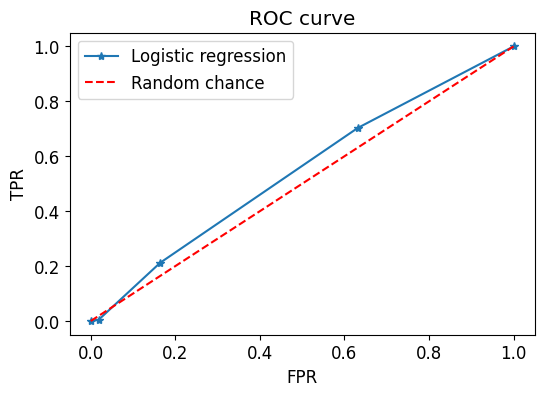

In [108]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()


In [109]:
thresholds

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [106]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642